In [65]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [66]:
def dist(x1, x2):
    # x1 and x2 are vectors of coordinates
    return np.sqrt(((x1-x2)**2).sum())

def knn(train,query, k= 5):
    m = train.shape[0]
  
    vals = []
    for i in range(m):
        ix = train[i,:-1]
        iy = train[i,-1]
        d = dist(query,ix)
        vals.append((d,iy)) ## tuple
    ## sorting list vals by d
    dk = sorted(vals,key = lambda x: x[0])[:k]
    labels = np.array(dk)[:,-1]
    output = np.unique(labels,return_counts = True)
    index = np.argmax(output[1])
    return output[0][index]

In [67]:
cap = cv2.VideoCapture(0)
face = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
face_data = []
path = "face/"
label = []
class_id = 0
names = {}
files = [f for f in os.listdir(path) if f.endswith('.npy')]

0 kmon
1 Mmon
2 navya
3 pmon
(535, 30000)
(535, 1)


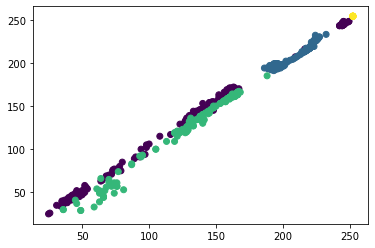

In [68]:
for fx in files:
    
   
    names[class_id] = fx[:-4]
    data_item = np.load('face/'+fx)
    face_data.append(data_item)
    print(class_id, names[class_id])
    target = class_id*np.ones((data_item.shape[0]))
    class_id +=1
    label.append(target)

face_dataset= np.concatenate(face_data,axis = 0)
face_dataset = face_dataset.reshape((face_dataset.shape[0], -1))
face_labels = np.concatenate(label,axis = 0).reshape((-1,1));
print(face_dataset.shape)
print(face_labels.shape)
plt.scatter(face_dataset[:,2],face_dataset[:,1],c=face_labels)
plt.show()

In [5]:
train = np.concatenate((face_dataset, face_labels), axis = 1)
print(train.shape)

(535, 30001)


In [6]:
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    if ret== False:
        continue
    faces = face.detectMultiScale(frame,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(255,255,0),2)
        ## cropping region of interest
        offset = 10
        face_sect = frame[y- offset: y +h+offset, x-offset: x+w+offset]
        face_sect = cv2.resize(face_sect,(100,100))
        out = knn(train, face_sect.flatten())
        pred_name =  names[int(out)]
        cv2.putText(frame,pred_name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    cv2.imshow("faces",frame)
    key_pressed = cv2.waitKey(1) & 0XFF
    if key_pressed == ord('q'):
        break;
cap.release()
cv2.destroyAllWindows()